<a href="https://colab.research.google.com/github/kocherlab/naps/blob/main/docs/notebooks/naps_graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAPS graphics for the manuscript

## After NAPS

In [1]:
metadata_dict = {
    "04to05": {
        "video_path": "naps_data/videos/20220823-1633-cut-to-20220824-0400to0500-libx264.mp4",
        "naps_analysis_h5_path": "naps_data/naps-tracks/20220823-1633-cut-to-20220824-0400to0500-libx264-naps.analysis.h5",
        "sleap_analysis_h5_path": "naps_data/sleap-tracks/20220823-1633-cut-to-20220824-0400to0500-libx264.analysis.h5",
        "aruco_npy_path": "naps_data/aruco-tracks/20220823-1633-cut-to-20220824-0400to0500-libx264-aruco.npy",
        "n_individuals": 50,
        "n_expected_naps_tracks": 48,
    },
    "12to13": {
        "video_path": "naps_data/videos/20220823-1633-cut-to-20220824-1200to1300-libx264.mp4",
        "naps_analysis_h5_path": "naps_data/20220823-1633-cut-to-20220824-1200to1300-libx264-naps.analysis.h5",
        "sleap_analysis_h5_path": "naps_data/20220823-1633-cut-to-20220824-1200to1300-libx264.analysis.h5",
        "aruco_npy_path": "naps_data/20220823-1633-cut-to-20220824-1200to1300-libx264-aruco.npy",
        "n_individuals": 50,
        "n_expected_naps_tracks": 46,
    },
    "20to21": {
        "video_path": "naps_data/videos/20220823-1633-cut-to-20220824-2000to2100-libx264.mp4",
        "naps_analysis_h5_path": "naps_data/20220823-1633-cut-to-20220824-2000to2100-libx264-naps.analysis.h5",
        "sleap_analysis_h5_path": "naps_data/20220823-1633-cut-to-20220824-2000to2100-libx264.analysis.h5",
        "aruco_npy_path": "naps_data/20220823-1633-cut-to-20220824-2000to2100-libx264-aruco.npy",
        "n_individuals": 50,
        "n_expected_naps_tracks": 44,
    },
}

In [2]:
"""Read in the h5 and display basic info
"""

import h5py
import numpy as np


filename = metadata_dict["12to13"]["naps_analysis_h5_path"]
video_filename = metadata_dict["12to13"]["video_path"]
output_filename = ""

with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'naps_data/20220823-1633-cut-to-20220824-1200to1300-libx264-naps.analysis.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Utility functions for cleaning up tracks, plotting, and showing the video

In [3]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "x-large"  # medium, large, x-large, xx-large

mpl.style.use("seaborn-deep")

In [4]:
import h5py
import numpy as np

for expmt_name, expmt_metadata in metadata_dict.items():
    with h5py.File(expmt_metadata["sleap_analysis_h5_path"], "r") as f:
        metadata_dict[expmt_name]["occupancy_matrix_sleap"] = f["track_occupancy"][:]

    with h5py.File(expmt_metadata["naps_analysis_h5_path"], "r") as f:
        metadata_dict[expmt_name]["occupancy_matrix_naps"] = f["track_occupancy"][:]

    aruco_only = np.load(expmt_metadata["aruco_npy_path"], allow_pickle=True)
    aruco_only = aruco_only[:, 0, 0, :]
    metadata_dict[expmt_name]["occupancy_matrix_aruco"] = ~np.isnan(aruco_only)

    row_sum_sleap = np.sum(metadata_dict[expmt_name]["occupancy_matrix_sleap"], axis=1)
    metadata_dict[expmt_name]["mean_identifications_sleap"] = np.mean(row_sum_sleap)

    row_sum_naps = np.sum(
        metadata_dict[expmt_name]["occupancy_matrix_naps"][20:-20], axis=1
    )
    metadata_dict[expmt_name]["mean_identifications_naps"] = np.mean(row_sum_naps)

    row_sum_aruco = np.sum(metadata_dict[expmt_name]["occupancy_matrix_aruco"], axis=1)
    metadata_dict[expmt_name]["mean_identifications_aruco"] = np.mean(row_sum_aruco)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'naps_data/20220823-1633-cut-to-20220824-0400to0500-libx264.analysis.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

KeyError: 'mean_identifications_sleap'

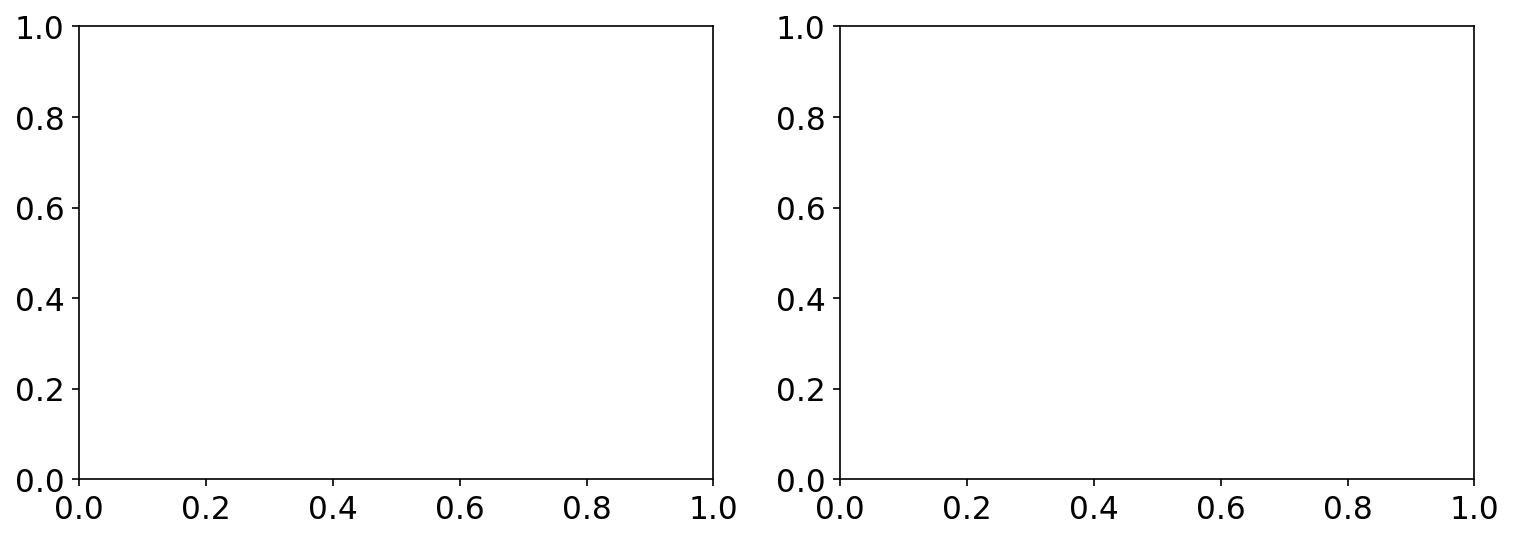

In [5]:
import palettable

pal = [
    "#F3722C",
    "#43AA8B",
    "#577590",
]  # [palettable.wesanderson.Moonrise7_5.hex_colors[0]] + ["#446455"] + [palettable.wesanderson.Moonrise7_5.hex_colors[2]]
mpl.style.use("seaborn-deep")
# palette = sns.color_palette(cc.glasbey, n_colors=arr.shape[3])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# fig.suptitle("Missingness frequency of tracklets")
sns.set_style("ticks")
import itertools

mean_identifications_sleap = [
    100
    * metadata_dict[expmt_name]["mean_identifications_sleap"]
    / metadata_dict[expmt_name]["n_individuals"]
    for expmt_name in metadata_dict.keys()
]
mean_identifications_naps = [
    (100 * metadata_dict[expmt_name]["mean_identifications_naps"] - 1)
    / metadata_dict[expmt_name]["n_expected_naps_tracks"]
    for expmt_name in metadata_dict.keys()
]
mean_identifications_aruco = [
    100
    * metadata_dict[expmt_name]["mean_identifications_aruco"]
    / metadata_dict[expmt_name]["n_expected_naps_tracks"]
    for expmt_name in metadata_dict.keys()
]
list_of_missing_freqs = [
    mean_identifications_sleap,
    mean_identifications_naps,
    mean_identifications_aruco,
]
data = pd.DataFrame(
    (_ for _ in itertools.zip_longest(*list_of_missing_freqs)),
    columns=["SLEAP (Temporal)", "NAPS", "ArUco"],
)
sns.swarmplot(
    ax=ax[0],
    data=data,
    size=10,
    palette=pal,
)

ax[0].set_ylim(0, 105)
sns.despine(offset=10, trim=False)
ax[0].set_ylabel("Percent of Expected Identifications\n per Frame")

mean_identifications_sleap = [
    metadata_dict[expmt_name]["occupancy_matrix_sleap"].shape[1]
    / metadata_dict[expmt_name]["n_individuals"]
    for expmt_name in metadata_dict.keys()
]
mean_identifications_naps = [
    (metadata_dict[expmt_name]["occupancy_matrix_naps"].shape[1] - 1)
    / metadata_dict[expmt_name]["n_expected_naps_tracks"]
    for expmt_name in metadata_dict.keys()
]
mean_identifications_aruco = [
    metadata_dict[expmt_name]["occupancy_matrix_aruco"].shape[1]
    / metadata_dict[expmt_name]["n_expected_naps_tracks"]
    for expmt_name in metadata_dict.keys()
]
list_of_track_counts = [
    mean_identifications_sleap,
    mean_identifications_naps,
    mean_identifications_aruco,
]

data = pd.DataFrame(
    (_ for _ in itertools.zip_longest(*list_of_track_counts)),
    columns=["SLEAP (Temporal)", "NAPS", "ArUco"],
)
sns.swarmplot(
    ax=ax[1],
    data=data,
    palette=pal,
    size=10,
)
plt.axhline(1, lw=3, color="darkgray", ls="--")
plt.ylim(0, 3)
sns.despine(offset=10, trim=False)
ax[1].set_ylabel(
    "Ratio of Number of Unique Identities\n to Expected Number of Unique Identities"
)
plt.tight_layout()
plt.savefig("figures/naps_comparison_metrics.png", dpi=600, bbox_inches="tight")

In [ ]:
import sys
sys.path.append('../')
import utils.trx_utils as trx_utils

In [ ]:
import importlib
importlib.reload(trx_utils)
filtered_locations = trx_utils.fill_missing_np(locations)
filtered_locations = trx_utils.smooth_median(filtered_locations)


100%|██████████| 1598/1598 [00:00<00:00, 6712.13it/s]


Frame 3314


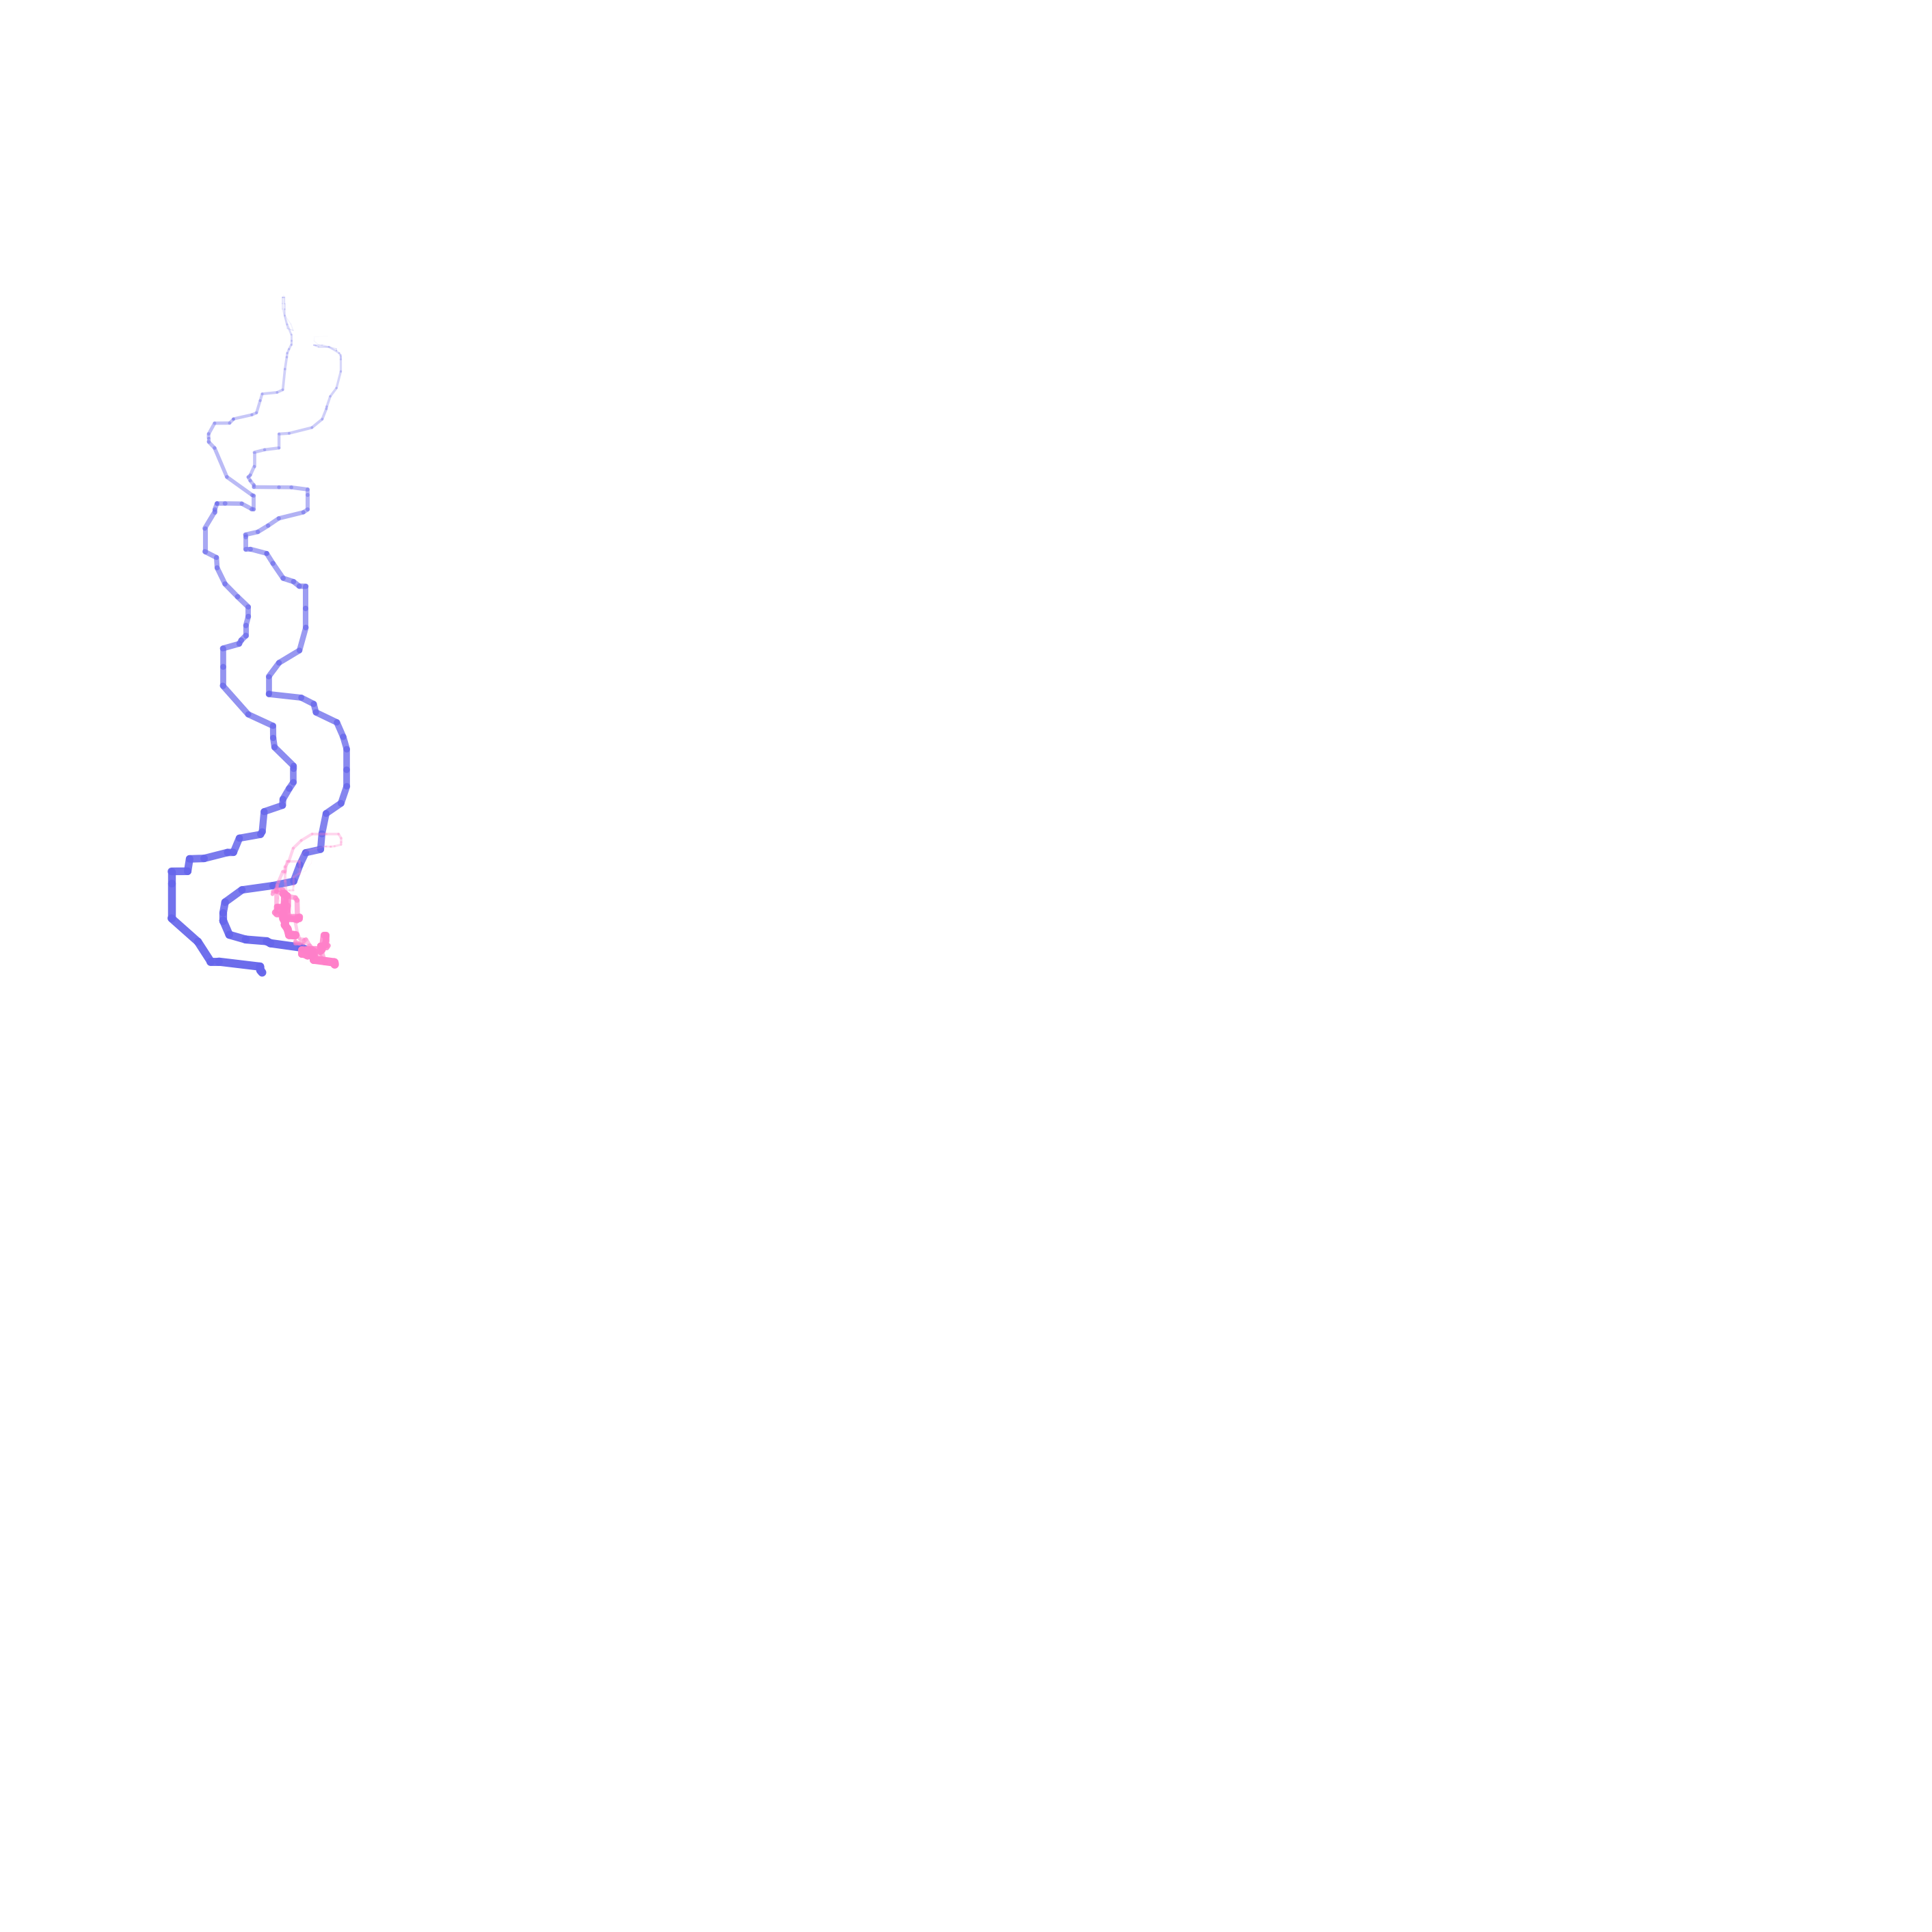

In [ ]:
trail_length= 100
data = filtered_locations
frame_idx = 0
dpi=300

pal = ["#6666eb","#ff80c9"]

nodes_to_plot = [node_names.index(n) for n in ['antenna_l','antenna_r']]

fig, ax = plt.subplots(figsize=(3664 / 300, 3664 / 300), dpi=dpi)
plt.xlim(0,3664)
plt.ylim(-3664,0)
print(f"Frame {frame_idx}")
data_subset = data[max((frame_idx - trail_length), 0) : (frame_idx), :, :, :]
plt.axis("off")
ax.set_aspect('equal')
fly_idxs = [13,14]
for fly_idx in range(2):
    for node_idx in nodes_to_plot:
        for idx in range(2, data_subset.shape[0]):
            if trail_length != 1:
                # Note that you need to use single steps or the data has "steps"
                plt.plot(
                    data_subset[(idx - 1) : (idx + 1), node_idx, 0, fly_idxs[fly_idx]],
                    -data_subset[(idx - 1) : (idx + 1), node_idx, 1, fly_idxs[fly_idx]],
                    linewidth=3 * idx / data_subset.shape[0],
                    color=pal[fly_idx],
                    alpha=(idx / data_subset.shape[0]),
                    solid_capstyle="round",
                )
            else:
                plt.scatter(
                    data_subset[idx, node_idx, 0, fly_idx],
                    data_subset[idx, node_idx, 1, fly_idx],
                    color=palettable.tableau.Tableau_20.mpl_colors[node_idx],
                )
plt.savefig("figures/trail.png",bbox_inches='tight', dpi=300, pad_inches=0)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl
from matplotlib.patches import Circle
from matplotlib import patches

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 6
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "large"  # medium, large, x-large, xx-large

mpl.style.use("seaborn-deep")

In [ ]:
import scipy.io as sio
touch_mat = sio.loadmat('example_data/touch_detector_frequency_by_indiv.mat')
scatter_data = touch_mat['scatter_data']

In [ ]:
list_by_interaction_type = [scatter_data[:,i][0][0] for i in range(3)]
array = np.column_stack(list_by_interaction_type)

touch_df = pd.DataFrame(array, columns=["Ant-Body", "Ant-Abd", "Ant-Ant"])
pal = ['#008080',"#800000", "#3333CC"]
sns.set_palette(sns.color_palette(pal))

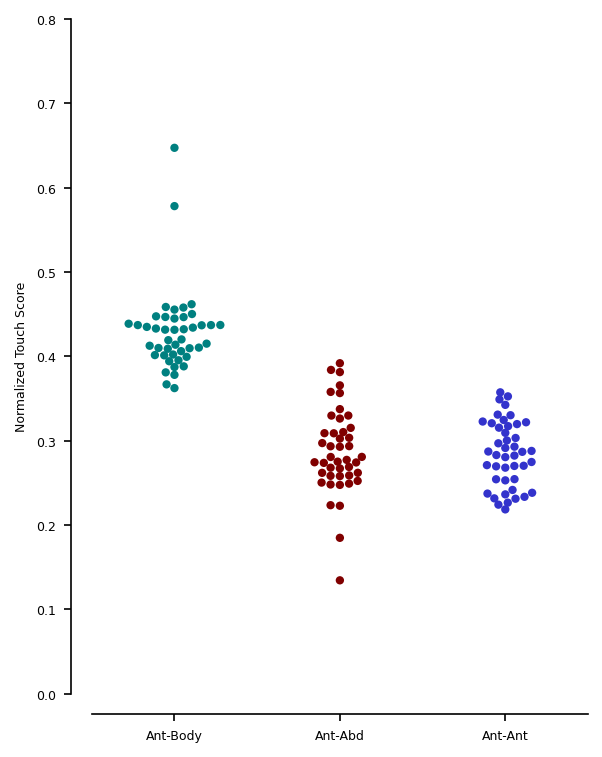

In [ ]:
pal = []
plt.figure(figsize=(4,5))
sns.swarmplot(data=touch_df, size=4, alpha=1,zorder=-10)
plt.ylabel("Normalized Touch Score")
sns.despine(offset=10, trim=False)
plt.tight_layout()
plt.ylim(0,0.8)
plt.savefig("figures/figure4_right_panel.png", dpi=300, bbox_inches="tight")